In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams["font.size"] = 16

In [3]:
from phd.utils.hepunit import electron_charge, pi, electron_mass_c2, meter, kilovolt

In [4]:
def length_runway(field):
    a = 11    
    return 2*electron_mass_c2*a/(field* abs(electron_charge))

In [5]:
print(length_runway(200*( kilovolt/ meter))/meter)

56.2098966


In [6]:
def dwyer_length_runway(field):
    density_ratio = 1.0/3.0
    return 7300*( kilovolt)/(field - 276*( kilovolt/ meter)*density_ratio)

In [7]:
print(dwyer_length_runway(200*( kilovolt/ meter))/meter)

67.5925925925926


In [8]:
field = np.linspace(100, 300,3, endpoint=True)*( kilovolt/ meter)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


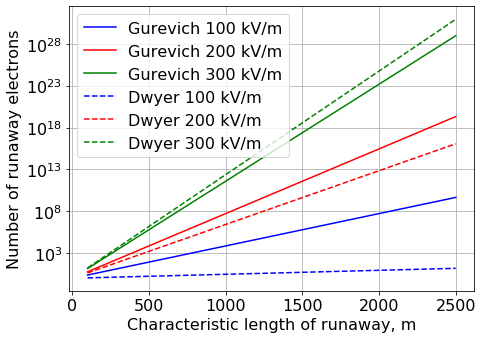

In [9]:
plt.figure(figsize=(7,5))

length_cell = np.arange(100, 2501, 100)
field = np.linspace(100, 300,3, endpoint=True)*( kilovolt/ meter)
color = ["b", "r", "g"]
for i, f in enumerate(field):
    length = length_runway(f)/meter
    format_ = "{}-".format(color[i])
    plt.plot(length_cell, np.exp(length_cell/length),format_, label="Gurevich {:d} kV/m".format(int(f/(kilovolt/meter))))

for i, f in enumerate(field):
    length_d = dwyer_length_runway(f)/meter
    format_ = "{}--".format(color[i])
    plt.plot(length_cell, np.exp(length_cell/length_d),format_, label = "Dwyer {:d} kV/m".format(int(f/(kilovolt/meter))))



plt.yscale("log")
plt.xlabel("Characteristic length of runaway, m")
plt.ylabel("Number of runaway electrons")
plt.grid(True)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig("gurevich.eps", format="eps")